In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import cv2
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import skew
from joblib import dump, load
import tensorflow as tf

ImportError: DLL load failed while importing _pywrap_py_exception_registry: The specified procedure could not be found.

In [1]:
import numpy as np
import scipy
import tensorflow as tf
print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)
print("Tensorflow version:", tf.__version__)
tf.test.is_gpu_available()

NumPy version: 1.26.4
SciPy version: 1.13.0
Tensorflow version: 2.10.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [1]:
import sys
print(sys.version)

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [2]:
import os
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # Set log level to debug
tf.debugging.set_log_device_placement(True)

# Test simple operation
a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
print(tf.matmul(a, b))

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [4]:
import subprocess

def get_gpu_details():
    try:
        result = subprocess.run(['nvidia-smi'], capture_output=True)
        output = result.stdout.decode('utf-8')
        print(output)
    except FileNotFoundError:
        print("nvidia-smi not found. Please make sure NVIDIA drivers are installed.")

# Call the function to display GPU details
get_gpu_details()

Wed May  8 00:31:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P5               7W /  54W |   2664MiB /  4096MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import torch
print("Is CUDA available: ", torch.cuda.is_available())
print("Num GPUs:", torch.cuda.device_count())


Is CUDA available:  False
Num GPUs: 0


In [6]:
import tensorflow as tf
import torch
import GPUtil
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ",device)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#export CUDA_VISIBLE_DEVICES=0
GPUtil.getAvailable()
use_cuda = torch.cuda.is_available()
if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)
else:
    print("None")


print(tf.config.list_physical_devices('GPU'))
# tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

Device:  cpu
Num GPUs Available:  1
None
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
# dir_raw_dataset = r'../MyDrive/RMIT/machine learning/Asm2/Furniture_Data'
dir_raw_dataset = 'data/Furniture_Data'
main_folder_path = dir_raw_dataset

In [2]:
# List all sub-folders in the main folder
sub_folders = [sub_folder for sub_folder in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, sub_folder))]
print(sub_folders)

NameError: name 'os' is not defined

In [8]:
def load_csv(dataset_folder, label_category, label_style, prompt = ""):
    # Folder path containing the images
    folder_path = dataset_folder  # Replace with the actual folder path

    # List all files in the folder
    file_list = os.listdir(folder_path)
    data_category_csv = []
    data_style_csv = []
    for file_name in file_list:
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        # print(file_path)
        if os.path.isfile(file_path):
            data_category_csv.append([file_path, label])
            data_style_csv.append([file_path, label_category, label_style])
    return data_csv

In [1]:
csv_category_data = []
csv_styles_data = []
for sub_folder in sub_folders:
      print("Accessing category: " + sub_folder)
      sub_folder_path = os.path.join(main_folder_path, sub_folder)
      # print(sub_folder_path)
      style_folders = [style_folder for style_folder in os.listdir(sub_folder_path) if os.path.isdir(os.path.join(sub_folder_path, style_folder))]
      # print(category_folders)
      for style_folder in style_folders:
        print(f'Accessing category {sub_folder} style {style_folder}')
        style_folder_path = os.path.join(sub_folder_path, style_folder)
        datas = load_csv(style_folder_path, sub_folder, style_folder)
        # csv_data.extend(datas)

print('Load succesffuly')


NameError: name 'sub_folders' is not defined

In [138]:
# Specify the file path and mode (e.g., 'w' for writing)

import os
import csv

file_path = 'data/data_raw.csv'

# Check if the directory exists
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)  # Create the directory if it does not exist

# Check if the file exists
if not os.path.isfile(file_path):
    with open(file_path, 'w') as file:
        file.write('')  # Create the file if it does not exist


# Open the CSV file in write mode and create a CSV writer object

with open(file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["ImgPath", "Class"])

    # Write the data to the CSV file row by row
    for row in csv_data:
        writer.writerow(row)
        
print('Data has been written to the CSV file.')

Data has been written to the CSV file.


In [141]:
# Load the dataset for Exploratory Data Analysis purpose
data_eda = pd.read_csv('./data/data_raw.csv')

# # Replace each class number into a furniture type
# for id, category in enumerate(sub_folders):
#     data_eda['Class'] = data_eda['Class'].replace(id, category)

# data_eda.rename(columns = {"Class": "Type"}, inplace = True)

print(data_eda) # Print the data frame
data_eda.info()

                                                 ImgPath   Class
0      data/Furniture_Data\beds\Asian\19726asian-dayb...    beds
1      data/Furniture_Data\beds\Asian\20027asian-cano...    beds
2      data/Furniture_Data\beds\Asian\20109asian-pane...    beds
3      data/Furniture_Data\beds\Asian\20508asian-plat...    beds
4      data/Furniture_Data\beds\Asian\20750asian-comf...    beds
...                                                  ...     ...
90078  data/Furniture_Data\tables\Victorian\5victoria...  tables
90079  data/Furniture_Data\tables\Victorian\6victoria...  tables
90080  data/Furniture_Data\tables\Victorian\7victoria...  tables
90081  data/Furniture_Data\tables\Victorian\8victoria...  tables
90082  data/Furniture_Data\tables\Victorian\9victoria...  tables

[90083 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90083 entries, 0 to 90082
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImgPath

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


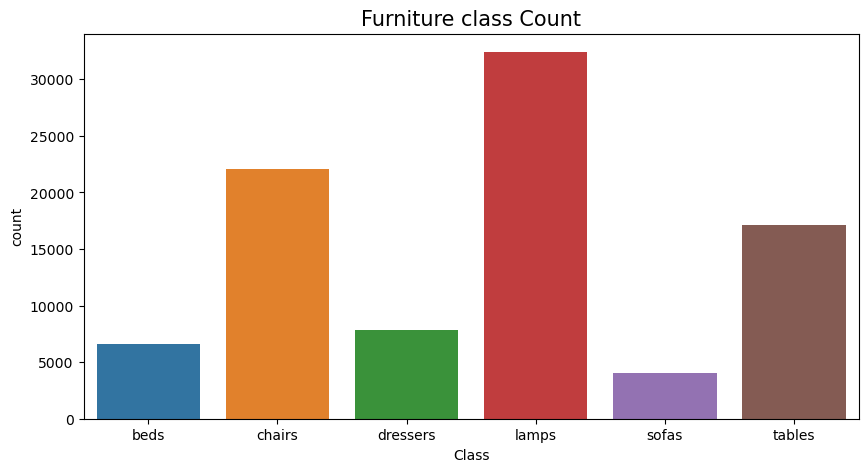

lamps       32401
chairs      22053
tables      17100
dressers     7871
beds         6578
sofas        4080
Name: Class, dtype: int64

In [147]:
# Plot bar graph
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(data_eda['Class'])
plt.title("Furniture class Count", fontsize = 15)
plt.show()

data_eda['Class'].value_counts()

In [148]:
df_raw = pd.read_csv('./data/data_raw.csv')
df_raw.head()

,ImgPath,Class
0,data/Furniture_Data\beds\Asian\19726asian-dayb...,beds
1,data/Furniture_Data\beds\Asian\20027asian-cano...,beds
2,data/Furniture_Data\beds\Asian\20109asian-pane...,beds
3,data/Furniture_Data\beds\Asian\20508asian-plat...,beds
4,data/Furniture_Data\beds\Asian\20750asian-comf...,beds


In [149]:
import os
from PIL import Image
import imagehash

image_hashes = {}
duplicates_count = 0

for i, row in df_raw.iterrows():
    img_path = row["ImgPath"]
    try:
        with Image.open(img_path) as im:
            img_hash = imagehash.phash(im)
            if img_hash in image_hashes:
                image_hashes[img_hash].append(row["ImgPath"])
                duplicates_count += 1
            else:
                image_hashes[img_hash] = [img_path]
    except IOError as e:
        print(f"Error opening {img_path}: {e}")
    except PermissionError as e:
        print(f"Permission error with {img_path}: {e}")


In [151]:
duplicated_image_hashes = {hash_val: paths for hash_val, paths in image_hashes.items() if len(paths) > 1}  # Remove hashes with a single path
print(f'Number of duplicated images: {duplicates_count}')
print(len(duplicated_image_hashes))

Number of duplicated images: 10645
8748


Number of duplicated images: 10645
8748


In [152]:
def get_last_three_path(full_path):
    # Normalize the path to avoid issues with different OS path separators
    normalized_path = os.path.normpath(full_path)
    
    # Split the path into parts
    path_parts = normalized_path.split(os.sep)
    
    # Get the last three components of the path
    last_three_parts = os.sep.join(path_parts[-3:])
    
    return last_three_parts

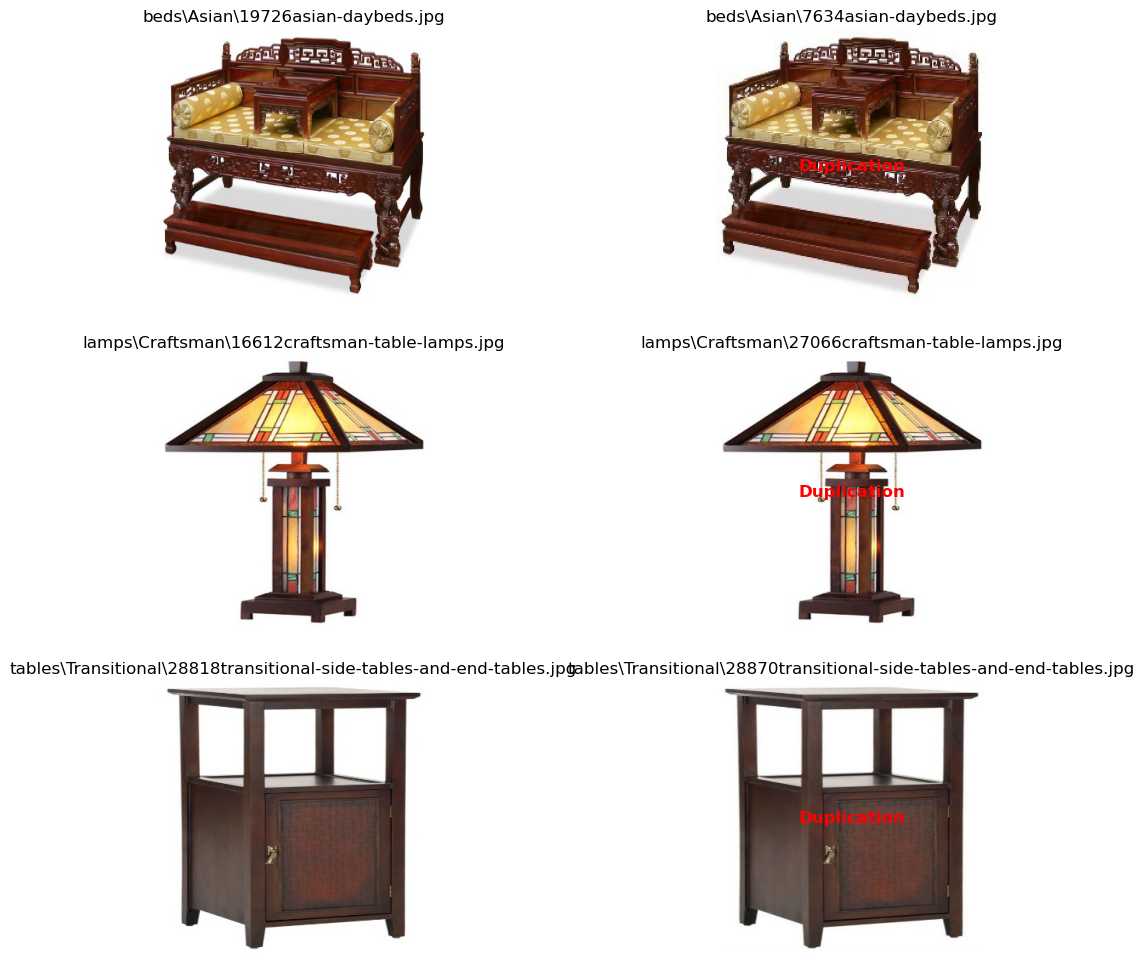

In [153]:
sample_indices = [0, len(duplicated_image_hashes.values()) // 2, len(duplicated_image_hashes.values()) - 1]

fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for iteration, sample_index in enumerate(sample_indices):
    paths = list(duplicated_image_hashes.values())[sample_index]
    for i, path in enumerate(paths):
        if i >= 2:
            break

        im = Image.open(f'{path}')
        ax[iteration, i].imshow(im)
        if i > 0:
            ax[iteration, i].text(
                0.5, 0.5, f'Duplication',
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax[iteration, i].transAxes,
                fontsize=12,
                color='red',
                weight='bold'
            )
        title_path = get_last_three_path(path)
        ax[iteration, i].set_title(title_path, fontsize=12)
        ax[iteration, i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.2)
plt.show()

In [46]:
print(duplicated_image_hashes.values())

dict_values([['data/Furniture_Data\\beds\\Asian\\19726asian-daybeds.jpg', 'data/Furniture_Data\\beds\\Asian\\7634asian-daybeds.jpg'], ['data/Furniture_Data\\beds\\Asian\\20508asian-platform-beds.jpg', 'data/Furniture_Data\\beds\\Asian\\3413asian-platform-beds.jpg'], ['data/Furniture_Data\\beds\\Asian\\20750asian-comforters-and-comforter-sets.jpg', 'data/Furniture_Data\\beds\\Asian\\3112asian-daybeds.jpg'], ['data/Furniture_Data\\beds\\Asian\\20802asian-platform-beds.jpg', 'data/Furniture_Data\\beds\\Asian\\2709asian-platform-beds.jpg'], ['data/Furniture_Data\\beds\\Asian\\2879asian-daybeds.jpg', 'data/Furniture_Data\\beds\\Contemporary\\151contemporary-daybeds.jpg', 'data/Furniture_Data\\beds\\Transitional\\4930transitional-daybeds.jpg'], ['data/Furniture_Data\\beds\\Asian\\7913asian-platform-beds.jpg', 'data/Furniture_Data\\beds\\Craftsman\\8019craftsman-platform-beds.jpg', 'data/Furniture_Data\\beds\\Midcentury\\7883midcentury-platform-beds.jpg'], ['data/Furniture_Data\\beds\\Asian\\

In [154]:
# remove duplicated images
df_clean = df_raw.copy()
# Paths to remove
paths_to_remove = list(duplicated_image_hashes.values())
images_to_remove = [sublist[0] for sublist in paths_to_remove if len(sublist) > 0]

# Filter the DataFrame
df_filtered = df_clean[~df_clean['ImgPath'].isin(images_to_remove)]

# Resetting the index
df_clean = df_filtered.reset_index(drop=True)
df_clean.to_csv("./data/df_clean.csv", index=False)

# Output the filtered DataFrame
print(df_clean)

                                                 ImgPath   Class
0      data/Furniture_Data\beds\Asian\20027asian-cano...    beds
1      data/Furniture_Data\beds\Asian\20109asian-pane...    beds
2      data/Furniture_Data\beds\Asian\2537asian-platf...    beds
3      data/Furniture_Data\beds\Asian\2637asian-platf...    beds
4      data/Furniture_Data\beds\Asian\2709asian-platf...    beds
...                                                  ...     ...
81330  data/Furniture_Data\tables\Victorian\5victoria...  tables
81331  data/Furniture_Data\tables\Victorian\6victoria...  tables
81332  data/Furniture_Data\tables\Victorian\7victoria...  tables
81333  data/Furniture_Data\tables\Victorian\8victoria...  tables
81334  data/Furniture_Data\tables\Victorian\9victoria...  tables

[81335 rows x 2 columns]


In [155]:
#Split data
df_clean = pd.read_csv('./data/df_clean.csv')

df_X = df_clean.drop('Class', axis = 1)
df_Y = df_clean['Class']

# split data 60% train, 20% val, %20 test
train_val_X, test_X, train_val_Y, test_Y = train_test_split( df_X, df_Y, shuffle=True, test_size=0.2, random_state=42)
train_X, val_X, train_Y, val_Y = train_test_split( train_val_X, train_val_Y, shuffle=True, test_size=0.25, random_state=42)

print(f"train_X shape: {train_X.shape}")
print(f"train_Y shape: {train_Y.shape}")
print(f"val_X shape: {val_X.shape}")
print(f"val_Y shape: {val_Y.shape}")
print(f"test_X shape: {val_X.shape}")
print(f"test_Y shape: {val_Y.shape}")

train_X shape: (48801, 1)
train_Y shape: (48801,)
val_X shape: (16267, 1)
val_Y shape: (16267,)
test_X shape: (16267, 1)
test_Y shape: (16267,)


In [156]:
# Save to csv
train_X.to_csv("./data/X_train_before_transformed.csv", index=False)
train_Y.to_csv("./data/Y_train_before_transformed.csv", index=False)
val_X.to_csv("./data/X_val.csv", index=False)
val_Y.to_csv("./data/Y_val.csv", index=False)
test_X.to_csv("./data/X_test.csv", index=False)
test_Y.to_csv("./data/Y_test.csv", index=False)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


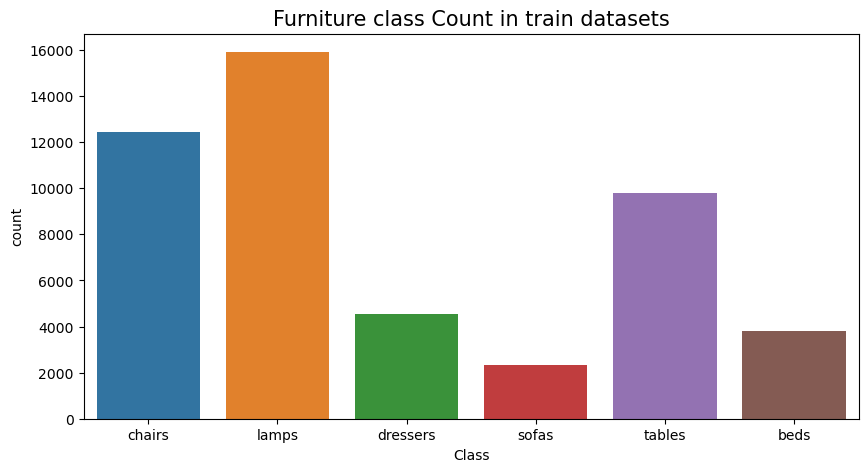

lamps       15907
chairs      12432
tables       9811
dressers     4543
beds         3798
sofas        2310
Name: Class, dtype: int64

In [157]:
# Plot bar graph
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(train_Y)
plt.title("Furniture class Count in train datasets", fontsize = 15)
plt.show()

train_Y.value_counts()

In [123]:
train_Y.head()

15249    chairs
39291     lamps
23383    chairs
39899     lamps
48406     lamps
Name: Class, dtype: object

### Data augmentation
We will upsample of sofas,dressers and beds, and downsample chairs, lamps, tables

In [4]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import imgaug as ia
from imgaug import augmenters as iaa

In [59]:
train_X_before_transformed = pd.read_csv('./data/X_train_before_transformed.csv')
train_Y_before_transformed = pd.read_csv('./data/Y_train_before_transformed.csv')
df_train_before_transformed = train_X_before_transformed.copy()
df_train_before_transformed['Class'] = train_Y_before_transformed

In [60]:
external_resources = ['beds', 'sofas']
external_csv = []
exernal_path = 'external_resources'
for external_data in external_resources:
    print("Accessing folder " + external_data)
    folder_path = os.path.join(exernal_path, external_data)
    datas = load_csv(folder_path, external_data)
    external_csv.extend(datas)

print('Load external resources successfully')

Accessing folder beds
Accessing folder sofas
Load external resources successfully


In [71]:
df_external = pd.DataFrame(external_csv)
df_external.rename(columns = {0:'ImgPath', 1:'Class'}, inplace = True)
df_resources_added = pd.concat([df_train_before_transformed, df_external], ignore_index=True)
df_resources_added.to_csv('./data/df_added.csv', index = False)
df_resources_added.head()

,ImgPath,Class
0,data/Furniture_Data\chairs\Traditional\11591tr...,chairs
1,data/Furniture_Data\lamps\Contemporary\2750con...,lamps
2,data/Furniture_Data\chairs\Transitional\22967t...,chairs
3,data/Furniture_Data\lamps\Contemporary\33conte...,lamps
4,data/Furniture_Data\lamps\Contemporary\902cont...,lamps


In [29]:
def create_augmentation_sequence():
    return iaa.Sequential([
        iaa.Fliplr(0.5),  # horizontal flips
        iaa.Crop(percent=(0, 0.1)),  # random crops
        iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.5))),
        iaa.LinearContrast((0.75, 1.5)),
        iaa.Multiply((0.8, 1.2), per_channel=0.2),
        iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                   translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                   rotate=(-25, 25),
                   shear=(-8, 8))
    ])


In [38]:
def augment_images(df, category, target_count=8000):
    # Filter DataFrame by category
    category_df = df[df['Class'] == category]
    current_count = len(category_df)
    seq = create_augmentation_sequence()

    output_dir = os.path.join('augmentation', category)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # While loop to keep generating until we reach the target count
    while current_count < target_count:
        for _, row in category_df.iterrows():
            img_path = row['ImgPath']
            try:
                image = Image.open(img_path)
                image_np = np.array(image)  # Convert to numpy array for augmentation
                augmented_image_np = seq(images=[image_np])[0] 
                augmented_image = Image.fromarray(augmented_image_np)
                augmented_image.save(os.path.join(output_dir, f"{os.path.splitext(os.path.basename(img_path))[0]}_aug_{current_count}.png"))
                current_count += 1
                if current_count >= target_count:
                    break
            except Exception as e:
                print(f"Failed to process {img_path}: {e}")

    return data


In [39]:
categories = ['dressers', 'sofas', 'beds']
df_resources_added = pd.read_csv('./data/df_added.csv')
augmented_csv[]
for category in categories:
    augment_images(df_resources_added, category)

In [49]:
data_augmenation_csv = []
augmentation_path = 'augmentation'
for category in categories:
    print("Accessing folder " + category)
    folder_path = os.path.join(augmentation_path, category)
    datas = load_csv(folder_path, category)
    data_augmenation_csv.extend(datas)

print('Load augmentation data successfully')

Accessing folder dressers
Accessing folder sofas
Accessing folder beds
Load augmentation data successfully


In [72]:
# Balance all classes to 8000 samples
df_augmentation = pd.DataFrame(data_augmenation_csv)
df_augmentation.rename(columns = {0:'ImgPath', 1:'Class'}, inplace = True)
df_resources_added = pd.read_csv('./data/df_added.csv')
df_sampling = pd.concat([df_resources_added, df_augmentation], ignore_index=True)
df_sampling.to_csv('./data/df_sampling.csv', index = False)

# Group by the category and then sample
df_final = df_sampling.groupby('Class').apply(lambda x: x.sample(min(len(x), 8000))).reset_index(drop=True)
df_final['Class'].value_counts()
df_final.to_csv('./data/df_final.csv')



In [74]:
X_train_final = df_final.drop('Class', axis = 1)
Y_train_final = df_final['Class']
X_train_final.to_csv('./data/X_train_final.csv', index = False)
Y_train_final.to_csv('./data/Y_train_final.csv', index = False)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


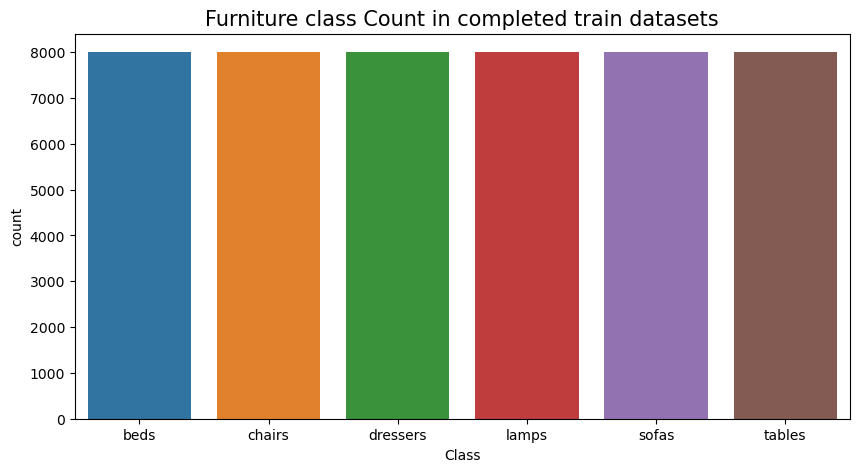

beds        8000
chairs      8000
dressers    8000
lamps       8000
sofas       8000
tables      8000
Name: Class, dtype: int64

In [76]:
# Plot bar graph
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(Y_train_final)
plt.title("Furniture class Count in completed train datasets", fontsize = 15)
plt.show()
Y_train_final.value_counts()